# Model-1 -- ResNet50_V2 - 100mm

In [60]:
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = True
# Freeze all layers except for the last n Layers
for layer in base_model.layers[:-15]: #80
    layer.trainable = False
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")
outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001),
                metrics=["accuracy"])
history_model_1 = model_1.fit(train_100, epochs=50,
                              steps_per_epoch=len(train_100),
                              validation_data=val_100,
                              validation_steps=(len(val_100)),
                              callbacks=[create_tensorboard_callback(dir_name="Tensorboard/New",
                                                                     experiment_name="Model_1")])      

Shape after passing inputs through base model: (None, 7, 7, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Saving TensorBoard log files to: Tensorboard/New/Model_1/20240208-122956
Epoch 1/50


ResourceExhaustedError: Graph execution error:

Detected at node 'model_12/resnet50v2/conv4_block6_preact_bn/FusedBatchNormV3' defined at (most recent call last):
    File "C:\Users\sanja\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\sanja\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\traitlets\config\application.py", line 1077, in launch_instance
      app.start()
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\sanja\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\sanja\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\sanja\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\ipykernel\kernelbase.py", line 529, in dispatch_queue
      await self.process_one()
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\ipykernel\kernelbase.py", line 518, in process_one
      await dispatch(*args)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\ipykernel\kernelbase.py", line 424, in dispatch_shell
      await result
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\ipykernel\kernelbase.py", line 766, in execute_request
      reply_content = await reply_content
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute
      res = shell.run_cell(
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\sanja\AppData\Local\Temp\ipykernel_16572\977386875.py", line 17, in <module>
      history_model_1 = model_1.fit(train_100, epochs=50,
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "D:\OneDrive - PDPM IIITDM Jabalpur\Python\Jupyter Lab\Acer\Image Classification\DL\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 634, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'model_12/resnet50v2/conv4_block6_preact_bn/FusedBatchNormV3'
OOM when allocating tensor with shape[32,1024,14,14] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_12/resnet50v2/conv4_block6_preact_bn/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_216331]

In [54]:
model_1.evaluate(test_100)

2/2 [==============================] - 0s 43ms/step - loss: 7.2996e-04 - accuracy: 1.0000


[0.0007299575954675674, 1.0]

In [55]:
model_1.evaluate(test_200)

2/2 [==============================] - 0s 33ms/step - loss: 3.0339 - accuracy: 0.5000


[3.0338621139526367, 0.5]

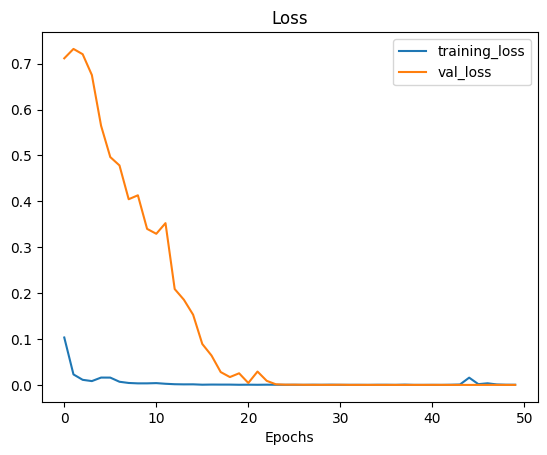

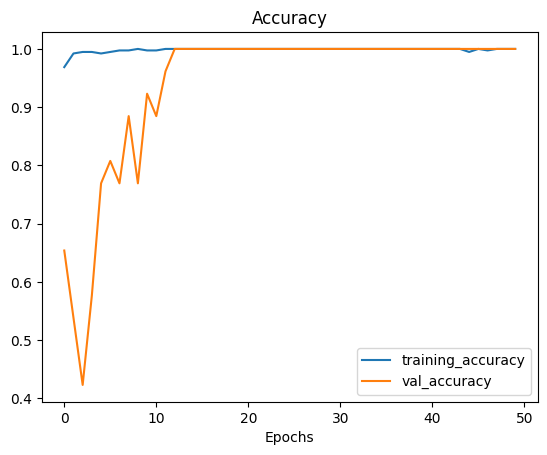

In [56]:
plot_loss_curves(history_model_1)

# Confusion Matrix

## Prediction on Test Data

In [80]:
test_100_pred = model_1.predict(test_100)
test_100_y_pred = np.where(test_100_pred > 0.5, 1, 0)
test_100_y_pred[:10]

2/2 [==============================] - 1s 409ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [81]:
test_100_labels = []
for images, labels in test_100.unbatch():
    test_100_labels.append(labels.numpy())
test_100_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [82]:
[len(test_100_labels), len(test_100_y_pred)]

[40, 40]

In [83]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true=test_100_labels,
                                  y_pred=test_100_y_pred)
sklearn_accuracy

1.0

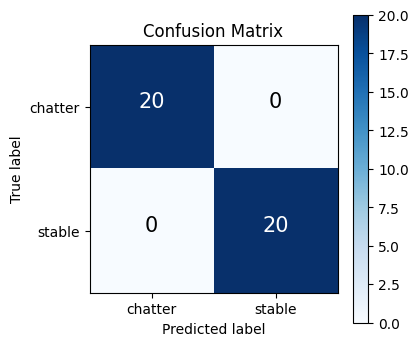

In [84]:
cm_100_data = make_confusion_matrix(y_true=test_100_labels,
                       y_pred=test_100_y_pred,
                      classes=class_names,
                      figsize=(4,4))